<a href="https://colab.research.google.com/github/Andrew11Morozov/Tester/blob/main/test_nikita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание от Цифровой двойник, Никита


В качестве тестового задания предлагается
 сделать анализ предложенного датасета с фактической и прогнозной численностью населения в городах. Интересны социально-экономические выводы и гипотезы по дальнейшей работе с этими данными.




 Задание желательно оформить на R (Питоновский стек или MS Excel тоже возможен как равнозначная альтернатива), а результаты оформить в виде дашборда

# Отчет о работе:

Тестовое задание выполнено с помощью Colaboratory на языке Python. Дашборд выполнен на сайте public.tableau.com и представлен в виде публичного файла.
Отчеты можно посмотреть перейдя по ссылкам:

https://public.tableau.com/app/profile/andrew1788/viz/digitaltwin/digitaltwin#2


В процессе работы с предложенными данными




 ## Подготовим данные для исследования

 Загрузка библиотек, которые понадобятся для работы с данными

In [1]:
import pandas as pd
from google.colab import drive
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import plotly.express as px

Получение доступа к данным

In [2]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


Чтение файла с данными

In [3]:
df = pd.read_csv('forFBpost.csv', sep=';')
df_1 = df

Рассмотрим, что за данные у нас есть?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   Модель           30250 non-null  float64
 4   Нижняя граница   30250 non-null  float64
 5   Верхняя граница  30250 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [5]:
df.sample(5)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
5294,Никольск,2091,NaN,5100.0,5000.0,5200.0
22936,Болохово,2067,NaN,5500.0,5400.0,5500.0
1797,Райчихинск,2103,NaN,17400.0,16700.0,18100.0
30073,Якутск,2065,NaN,658100.0,653600.0,662600.0
6446,Ветлуга,2033,NaN,8400.0,8400.0,8500.0


Первый взгляд на данные:

Данные содержат 30250 строк.

Предполагаемые легенды полей

**Город**	- название города;

**year** - год исследования или прогноза;

**fact** - фактическое количество населения, если доступно (известно);

**Модель** - Количество населения, подсчитанное моделью;

**Нижняя граница** - нижняя граница количество населения, подсчитанного моделью;

**Верхняя граница** - верхняя граница количество населения, подсчитанного моделью.

Отсутствие данных в столбце **fact** объясняется отсутствием данных по фактическому населению в прошедшие периоды и датами в будущем.

Таких строк в датасете:

In [6]:
df.isna().sum()



Город                  0
year                   0
fact               27000
Модель                 0
Нижняя граница         0
Верхняя граница        0
dtype: int64

Для дальнейшей работы приведем в соответствие правилам pandas название столбцов, а также тип данных.

**year** в тип *time*, а **Нижняя и Верхняя граница, fact, model** в тип *int64*

In [7]:
# переименование столбцов
df = df.rename(columns={'Город': 'town', 'year': 'year', 'Модель': 'model', 'Нижняя граница': 'lower_limit', 'Верхняя граница': 'upper_limit'})

In [8]:
df.sample(5)

,town,year,fact,model,lower_limit,upper_limit
12733,Евпатория,2028,NaN,124700.0,124300.0,125100.0
1561,Завитинск,2109,NaN,10700.0,10400.0,11000.0
23867,Тобольск,2030,NaN,101700.0,101200.0,102200.0
19894,Красный Кут,2050,NaN,18300.0,17900.0,18800.0
8090,Приволжск,2104,NaN,5900.0,5700.0,6100.0


In [9]:
# Приведем в соответствие формат даты
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   town         30250 non-null  object        
 1   year         30250 non-null  datetime64[ns]
 2   fact         3250 non-null   float64       
 3   model        30250 non-null  float64       
 4   lower_limit  30250 non-null  float64       
 5   upper_limit  30250 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.4+ MB


In [10]:
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

In [11]:
df.head(10)

,town,year,fact,model,lower_limit,upper_limit
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0
5,Белокуриха,2005,NaN,15200.0,14800.0,15500.0
6,Белокуриха,2006,NaN,15100.0,14700.0,15400.0
7,Белокуриха,2007,NaN,15000.0,14600.0,15300.0
8,Белокуриха,2008,14781.0,14900.0,14600.0,15200.0
9,Белокуриха,2009,14781.0,14800.0,14500.0,15100.0


In [12]:
# Приведем в соответствие количество населения типу int64
df['lower_limit'] = df['lower_limit'].astype('int')
df['upper_limit'] = df['upper_limit'].astype('int')
df['model'] = df['model'].astype('int')
# Со столбцом fact чуть сложнее, но придется заменить NaN на 0!
df['fact'] = df['fact'].fillna(0).astype('int')

Окончательно таблица данных перед исследованием будет выглядеть так:

In [13]:
df.head(10)

,town,year,fact,model,lower_limit,upper_limit
0,Белокуриха,2000,0,15400,15100,15700
1,Белокуриха,2001,0,15400,15100,15700
2,Белокуриха,2002,0,15400,15000,15700
3,Белокуриха,2003,0,15300,15000,15700
4,Белокуриха,2004,0,15300,14900,15600
5,Белокуриха,2005,0,15200,14800,15500
6,Белокуриха,2006,0,15100,14700,15400
7,Белокуриха,2007,0,15000,14600,15300
8,Белокуриха,2008,14781,14900,14600,15200
9,Белокуриха,2009,14781,14800,14500,15100


In [14]:
#df.info()
df[df['fact'] == 0]['fact'].count()

27000

На всякий случай проверил нули в столбце **fact**. Их ровно 27000 шт, как и замененных *NaN*.

## Исследование данных.

Рассмотрим сколько и каких городов рассматривалось в исследовании:


In [16]:
print ('В исследовании рассматривалось - ', df['town'].nunique(),' городов.')
print('Вот их названия:', df['town'].unique())

В исследовании рассматривалось -  248  городов.
Вот их названия: ['Белокуриха' 'Новоалтайск' 'Краснодар' 'Анапа' 'Бородино' 'Шарыпово'
 'Большой Камень' 'Партизанск' 'Ессентуки' 'Лермонтов' 'Невинномысск'
 'Николаевск-на-Амуре' 'Завитинск' 'Белогорск' 'Райчихинск' 'Шимановск'
 'Сольвычегодск' 'Архангельск' 'Новодвинск' 'Бирюч' 'Мглин' 'Почеп'
 'Клинцы' 'Карабаново' 'Гороховец' 'Курлово' 'Киржач' 'Петушки'
 'Костерево' 'Покров' 'Юрьев-Польский' 'Гусь-Хрустальный' 'Калач-на-Дону'
 'Новоаннинский' 'Серафимович' 'Краснослободск' 'Камышин' 'Михайловка'
 'Урюпинск' 'Фролово' 'Бабаево' 'Красавино' 'Вытегра' 'Никольск' 'Сокол'
 'Тотьма' 'Бобров' 'Бутурлиновка' 'Калач' 'Лиски' 'Новохопёрск' 'Павловск'
 'Семилуки' 'Ветлуга' 'Городец' 'Володарск' 'Кстово' 'Сергач' 'Арзамас'
 'Дзержинск' 'Кулебаки' 'Навашино' 'Гаврилов Посад' 'Заволжск' 'Наволоки'
 'Плес' 'Приволжск' 'Пучеж' 'Фурманов' 'Иваново' 'Кохма' ' Шуя' 'Бодайбо'
 'Вихоревка' 'Алзамай' 'Ангарск' 'Саянск' 'Усть-Илимск' 'Магас' 'Назрань'
 'Ка

Интересно какие года были взяты в качестве реального исследования количества населения, и какие года прогнозировались.

In [17]:
print ('В дата-сете рассмотрены прогнозы количества жителей городов с ', df.year.unique().min(), ' по ', df.year.unique().max(), 'годы. В период с ', df[df['fact']!=0]['year'].unique().min(), ' по ', df[df['fact']!=0]['year'].unique().max(),' годы есть данные о реальном количестве жителей в этих городах.')

В дата-сете рассмотрены прогнозы количества жителей городов с  2000  по  2120 годы. В период с  2008  по  2020  годы есть данные о реальном количестве жителей в этих городах.


In [18]:
df.year.unique()
#df[df['fact']==0]['year'].unique() # уникальные годы наблюдения и прогнзирования

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054,
       2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109,
       2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120])

In [19]:
df[df['fact']==0]['year'].unique() # уникальные годы прогнзирования

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056,
       2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
       2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078,
       2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089,
       2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100,
       2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111,
       2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120])

In [20]:
df[df['fact']!=0]['year'].unique() # уникальные годы наблюдения Когда есть реальное количество жителей городов.

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

Данные подготовлены, приведены в удобный для исследования вид. Можно приступать к исследованию.

# Исследование данных.

##Сравнение фактической и прогнозной численности населения городов

Для сравнения фактической и прогнозной численности любого города воспользуемся графиком для удобства восприятия. В качестве примера исследуем город Бокситогорск.

Бокситогорск


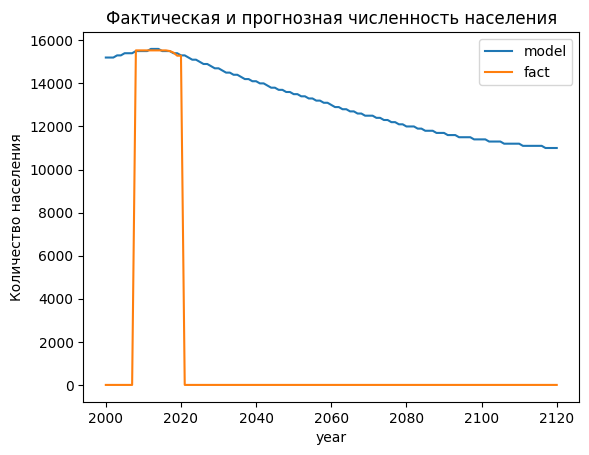

In [21]:
print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].plot(x="year", y=["model", "fact"], title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения');

График не удобен для восприятия, так как охватывает слишком большой временной отрезок. Ограничим участок вывода на график годами, когда есть данные о фактическом количестве жителей. И нули все же придется заменить на NaN для удобства восприятия (подошва - не красивая).

In [22]:
df['fact'] = df[df['fact']!=0]['fact']
df.head(10)

,town,year,fact,model,lower_limit,upper_limit
0,Белокуриха,2000,NaN,15400,15100,15700
1,Белокуриха,2001,NaN,15400,15100,15700
2,Белокуриха,2002,NaN,15400,15000,15700
3,Белокуриха,2003,NaN,15300,15000,15700
4,Белокуриха,2004,NaN,15300,14900,15600
5,Белокуриха,2005,NaN,15200,14800,15500
6,Белокуриха,2006,NaN,15100,14700,15400
7,Белокуриха,2007,NaN,15000,14600,15300
8,Белокуриха,2008,14781.0,14900,14600,15200
9,Белокуриха,2009,14781.0,14800,14500,15100


Бокситогорск


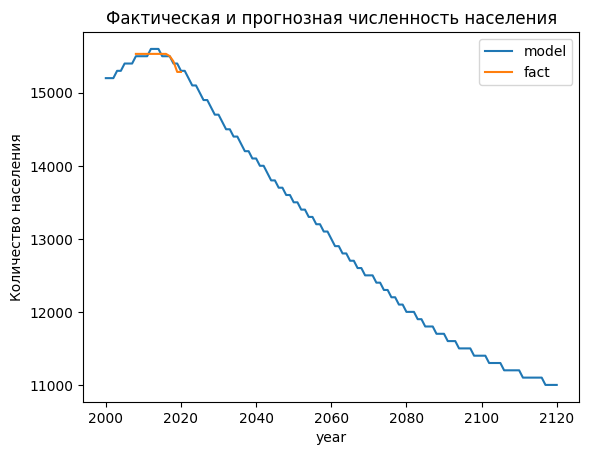

In [23]:
print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].plot(x="year", y=["model", "fact"], title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения');

График тоже не очень красив, сократим диапазон дат до годов в которых были замеры фактического количества населения.

Бокситогорск


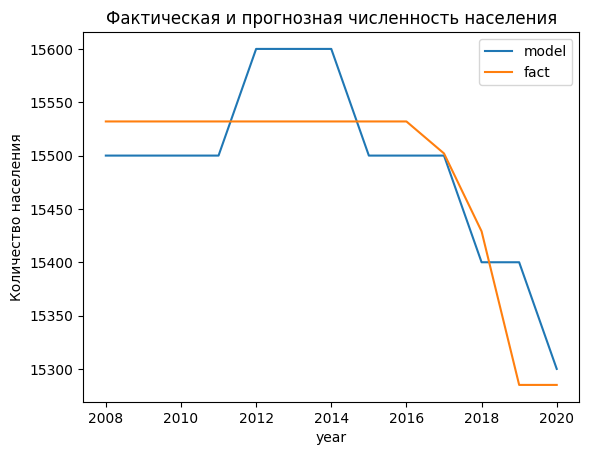

In [24]:
print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].query('year >=2008 & year <= 2020').plot(x="year", y=["model", "fact"], title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения');

График получился тоже не очень информативным: отличие модели от фактического количества населения есть, но понять из графика о величине и критичности этого отклонения невозможно.

Более удобным будет график попадания фактической численности населения в промежуток **МИН** и **МАКС** расчетной модели. Для удобства восприятия размер можно сделать побольше, а вывод на экран, как гистограмму.

Бокситогорск


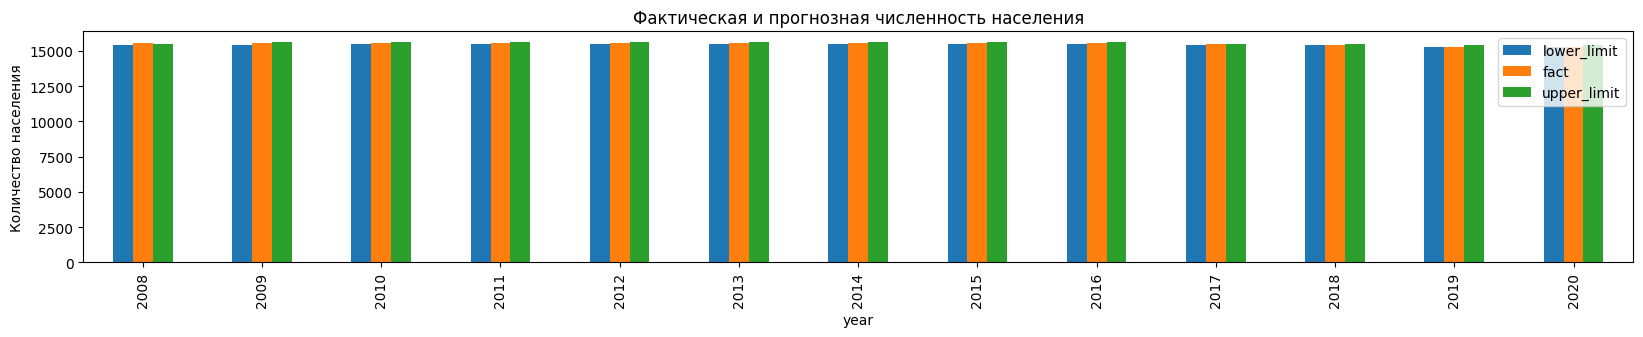

In [ ]:
print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].query('year >=2008 & year <= 2020').plot(figsize=(20, 3),
                                                                        kind="bar",x="year", y=["lower_limit", "fact", "upper_limit"],
                                                                        title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения');

На графике можно разглядеть, что фактическое количество населения в наблюдаемом промежутке времени практически всегда находиться между **МИН** и **МАКС** значениями, расчитаными моделью.

Но на графике плохо видна тенденция (роста или падения). Исправить данное недоразумение поможет изменение масштаба и координат оси *количество населения*.

Бокситогорск


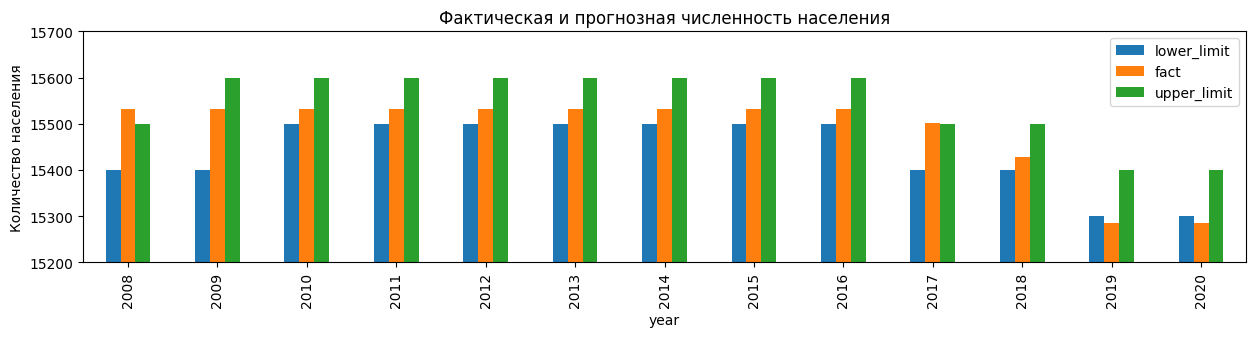

In [ ]:
print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].query('year >=2008 & year <= 2020').plot(figsize=(15, 3),
                                                                        kind="bar",x="year", y=["lower_limit", "fact", "upper_limit"],
                                                                        title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения',
                                                                       ylim=(15200,15700));


Получился наиболее информативный график соответствия расчетов модели фактическому количеству населения.

Просмотр этого графика имеет смысл тоько для отдельных городов. Просмотр по всем представленным данным может исказить результаты, так как  модель может давать неверные прогнозы, как в верхнюю сторону, так и в нижнюю сторону по разным городам.

##Рассмотрение тенденций изменения населения городов на длительном периоде.

Вывод графической информации о прогнозе модели до 2120 года по разным городам может показать тенденцию развития этого города в связи и с изменениями количества жителей.

Бокситогорск


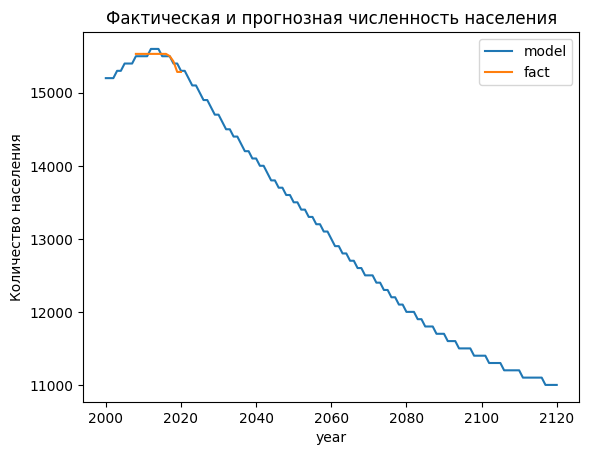

In [ ]:
print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].plot(title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения', x="year", y=["model", "fact"]);

Для другого города:

Анапа


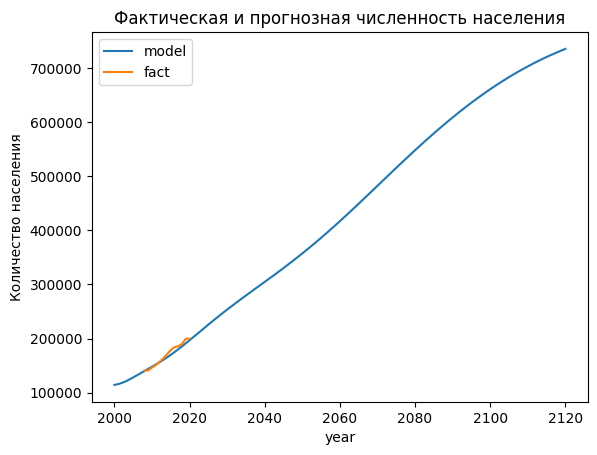

In [25]:
print (df[df['town']=='Анапа']['town'].values [0])
df[df['town']=='Анапа'].plot(title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения', x="year", y=["model", "fact"]);

Рассматривая тенденции изменения населения в конкретном городе может возникнуть ситуация необходимости сравнения перспектив в разных городах.

##Сравнение перспектив развития населения в разных городах.

Распологая графики один под другим, можно увидеть различие меджу этими городами.

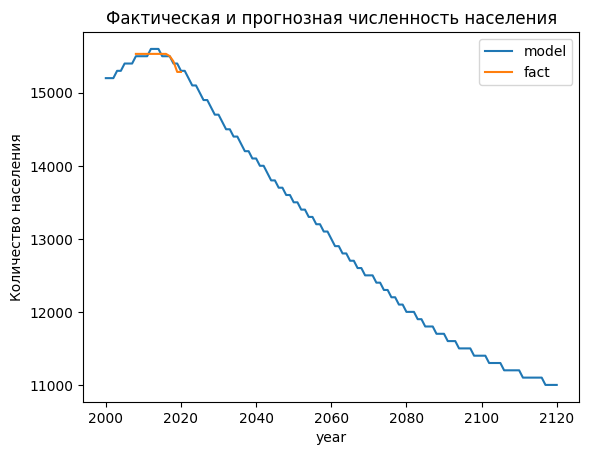

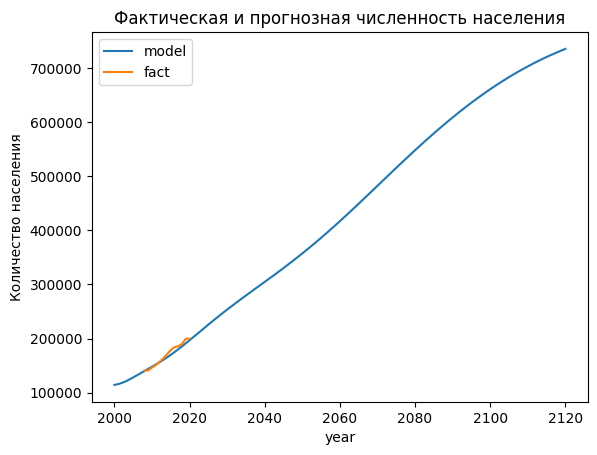

In [27]:
#print (df[df['town']=='Бокситогорск']['town'].values [0])
df[df['town']=='Бокситогорск'].plot(title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения', x="year", y=["model", "fact"])
print()
#print (df[df['town']=='Анапа']['town'].values [0])
df[df['town']=='Анапа'].plot(title='Фактическая и прогнозная численность населения', ylabel= 'Количество населения', x="year", y=["model", "fact"]);

In [34]:
print (df[df['town']=='Ялта'].tail(25))  #.values [0]

       town  year  fact   model  lower_limit  upper_limit
13043  Ялта  2096   NaN  198300       196600       200000
13044  Ялта  2097   NaN  198900       197200       200600
13045  Ялта  2098   NaN  199500       197800       201100
13046  Ялта  2099   NaN  200000       198400       201700
13047  Ялта  2100   NaN  200600       198900       202200
13048  Ялта  2101   NaN  201100       199400       202800
13049  Ялта  2102   NaN  201600       199900       203300
13050  Ялта  2103   NaN  202100       200400       203800
13051  Ялта  2104   NaN  202600       200900       204300
13052  Ялта  2105   NaN  203100       201400       204800
13053  Ялта  2106   NaN  203500       201900       205200
13054  Ялта  2107   NaN  204000       202300       205700
13055  Ялта  2108   NaN  204400       202700       206100
13056  Ялта  2109   NaN  204900       203200       206600
13057  Ялта  2110   NaN  205300       203600       207000
13058  Ялта  2111   NaN  205700       204000       207400
13059  Ялта  2

На графике видно, что в Тольяти за 2046 год,в городе Набережные челны за 2078, в Ялте за 2099 нет сведений по прогнозам. Также нет в некоторых других.